In [68]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import pandas as pd
#train & test the model 
from sklearn.model_selection import train_test_split
#Import the numpy library 
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

import nltk 
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('movie_reviews') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
# Imported the necessary libraries
import csv
import urllib.request as urllib2
from nltk import FreqDist
# Importing data using url
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)

#converting into dataframe
df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [70]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,50449,2481,"find that real natural , even-flowing tone tha...",3
1,134737,7272,by the better film 's ability to make its subj...,3
2,146596,7975,invested in undergraduate doubling subtexts an...,1
3,48468,2368,modernize and,2
4,114710,6104,hit you,2


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(df ['Phrase'], df ['Sentiment'], test_size=0.3, random_state=2003)
documents=[]
X_train = np.array(X_train.values.tolist())#converting training set into numpy array list
Y_train = np.array(Y_train.values.tolist())#converting testing set into numpy array list


for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) #tokenization performed(each word get separated)

documents[0]

[['Belongs',
  'in',
  'the',
  'too-hot-for-TV',
  'direct-to-video\\/DVD',
  'category',
  ',',
  'and',
  'this'],
 2]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
#parameters that affect the result
remove_stopwords = True
useStemming = False
useLemma = True
removePuncs = True


In [73]:
for l in range(len(documents)):                    
  label = documents[l][1]                          
  tmpReview = []                                   
  for w in documents[l][0]:                       
    newWord = w                                    
    if remove_stopwords and (w in stopwords_en):  #remove stopwords 
      continue                                     
    if removePuncs and (w in punctuations):       #remove punctuations 
      continue                                    
    if useStemming:
      
      #newWord = porter.stem(newWord) # porter stemmer 
      newWord = lancaster.stem(newWord) # Lancaster stemmer 
    if useLemma:  # usage of Lemma
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                      
  documents[l] = (tmpReview, label)             #clean review list updated
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('Belongs too-hot-for-TV direct-to-video\\/DVD category', 2)


In [74]:
df = pd.DataFrame(documents, columns=['text', 'sentiment']) 
df.head()



,text,sentiment
0,Belongs too-hot-for-TV direct-to-video\/DVD ca...,2
1,US budget,2
2,comic turn,2
3,great cast,3
4,nurture multi-layers character,4


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],  df['sentiment'], test_size=0.3, random_state=2003)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(max_features = 2500)
X = vectorizer.fit_transform(df["text"]) 
Y = df['sentiment'] 
 
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test


In [77]:
Y_test

13510     3
61932     2
82549     2
137718    2
121990    3
         ..
94224     0
135456    2
154729    2
23031     2
57870     0
Name: sentiment, Length: 46818, dtype: int64

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

In [0]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:
num_classes = 5

In [81]:
X_train.shape

(109242, 2500)

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [83]:
Y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [0]:

from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential


In [0]:

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=8,
                 activation='relu',
                 input_shape=(2500,1)))
model.add(Conv1D(128, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Epoch 1/10
109242/109242 [==============================] - 38s 346us/step - loss: 1.1176 - acc: 0.5639 - f1_m: 0.4874 - precision_m: 0.6156 - recall_m: 0.4112
Epoch 2/10
109242/109242 [==============================] - 37s 340us/step - loss: 1.0163 - acc: 0.6026 - f1_m: 0.5622 - precision_m: 0.6658 - recall_m: 0.4882
Epoch 3/10
109242/109242 [==============================] - 37s 342us/step - loss: 0.9898 - acc: 0.6153 - f1_m: 0.5803 - precision_m: 0.6728 - recall_m: 0.5117
Epoch 4/10
109242/109242 [==============================] - 38s 345us/step - loss: 0.9771 - acc: 0.6197 - f1_m: 0.5884 - precision_m: 0.6762 - recall_m: 0.5222
Epoch 5/10
109242/109242 [==============================] - 38s 344us/step - loss: 0.9671 - acc: 0.6252 - f1_m: 0.5944 - precision_m: 0.6788 - recall_m: 0.5299
Epoch 6/10
109242/109242 [==============================] - 38s 346us/step - loss: 0.9572 - acc: 0.6285 - f1_m: 0.5995 - precision_m: 0.6819 - recall_m: 0.5361
Epoch 7/10
109242/109242 [==============

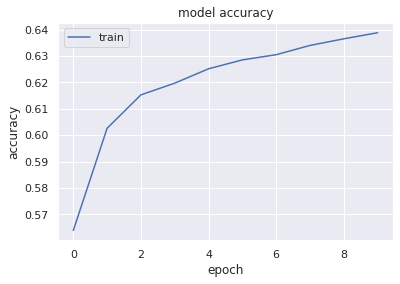

Test loss: 1.0027168404516709
Test accuracy: 0.6152761758298091
Test Figure-of-metrics score: 0.5927800026095363
Test precision: 0.6564246542333889
Test recall: 0.5418855995557265


In [88]:
history=model.fit(X_train, Y_train,
          batch_size=256,
          epochs=50)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test Figure-of-metrics score:', score[2])
print('Test precision:', score[3])
print('Test recall:', score[4])


In [89]:
from google.colab import drive 
drive.mount('/content/drive') #mount the google drive
model.save('/content/drive/My Drive/1110149_sentiment_analysis.h5') #to save the trained model 

KeyboardInterrupt: ignored